In [170]:
import json
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [129]:
response = urllib.request.urlopen("https://data.seattle.gov/resource/3k2p-39jp.json?$$app_token=bliCrIUruW7dINqHxu7yZBd3k")
raw_data = json.loads(response.read().decode('utf-8'))

In [130]:
raw_data[0]

{'at_scene_time': '2015-02-01T00:20:00',
 'cad_cdw_id': '581875',
 'cad_event_number': '15000035997',
 'census_tract': '9200.2014',
 'district_sector': 'K',
 'general_offense_number': '201535997',
 'hundred_block_location': '3 AV S / S WASHINGTON ST',
 'incident_location': {'latitude': '47.600875809',
  'longitude': '-122.330271593',
  'needs_recoding': False},
 'initial_type_description': 'AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY',
 'initial_type_group': 'AUTO RECOVERIES',
 'initial_type_subgroup': 'AUTO THEFTS',
 'latitude': '47.600875809',
 'longitude': '-122.330271593',
 'zone_beat': 'K3'}

In [131]:
for key in raw_data[2]:
    print(key+' '+str(type(key)))

hundred_block_location <class 'str'>
longitude <class 'str'>
at_scene_time <class 'str'>
initial_type_subgroup <class 'str'>
latitude <class 'str'>
census_tract <class 'str'>
general_offense_number <class 'str'>
initial_type_group <class 'str'>
cad_event_number <class 'str'>
zone_beat <class 'str'>
initial_type_description <class 'str'>
cad_cdw_id <class 'str'>
district_sector <class 'str'>
incident_location <class 'str'>


In [132]:
inc_type = {}
for s in raw_data:
    if 'initial_type_description' in s:
        inc_typeeach = s['initial_type_description']
        inc_type[inc_typeeach] = inc_type.get(inc_typeeach,1) + 1

to confirm that the key name is initial_type_description instead of incident_type_description, do the followings

In [133]:
cn = 0
for s in raw_data:
    if 'incident_type_description' in s:
        cn += 1

In [134]:
for s in inc_type.keys():
    if inc_type[s] > 10:
        print(s),

AUTO RECOVERY
UNKNOWN - COMPLAINT OF UNKNOWN NATURE
TRAFFIC STOP - OFFICER INITIATED ONVIEW
HARAS - NO BIAS, THREATS OR MALICIOUSNESS
FOLLOW UP
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)
SUSPICIOUS PERSON, VEHICLE OR INCIDENT
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW
FRAUD - FORGERY,BUNCO, SCAMS, ID THEFT, ETC
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)
ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS)
FIGHT - VERBAL/ORAL (NO WEAPONS)
BURG - RES (INCL UNOCC STRUCTURES ON PROP)
PROPERTY - DAMAGE
DISTURBANCE, MISCELLANEOUS/OTHER
FIGHT - IP - PHYSICAL (NO WEAPONS)
OVERDOSE - DRUG RELATED CASUALTY
PROPERTY - FOUND


<Container object of 89 artists>

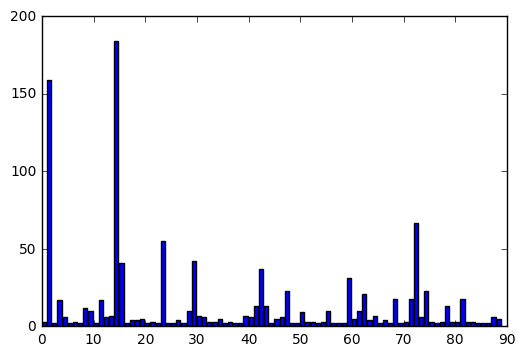

In [135]:
plt.bar(range(len(inc_type)), list(inc_type.values()))

In [136]:
ins_list2rep = ['HARAS - NO BIAS, THREATS OR MALICIOUSNESS', 'FOLLOW UP', 'SUSPICIOUS PERSON, VEHICLE OR INCIDENT'
                , 'ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)', 'THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)'
                , 'ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS)', 'FIGHT - VERBAL/ORAL (NO WEAPONS)'
                , 'FIGHT - IP - PHYSICAL (NO WEAPONS)']

get the prob of each of these incident

In [137]:
ins_total = sum(list(inc_type.values()))

In [138]:
ins_prob = [inc_type[s]/ins_total for s in inc_type.keys() if s in ins_list2rep]

In [142]:
longitude, latitude = [], []
for s in raw_data:
    if 'initial_type_description' in s.keys():
        if s['initial_type_description'] in ins_list2rep:
            longitude.append(s['longitude'])
            latitude.append(s['latitude'])

In [148]:
GPSco = open('GPSco.txt', 'w')
for i in range(len(longitude)):
  GPSco.write("{}, {};".format(latitude[i], longitude[i]))

In [159]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [163]:
dis_lim = 1;
neigh_num = []
long = [float(x) for x in longitude]
lati = [float(x) for x in latitude]
for i in range(len(long)):
    dis = []
    for j in range(i+1,len(long)):
        dis.append(haversine(long[i],lati[i],long[j],lati[j]))
    neigh_num.append(sum([x <= dis_lim for x in dis]))

In [164]:
neigh_num

[5,
 4,
 1,
 4,
 1,
 4,
 2,
 13,
 2,
 26,
 11,
 16,
 4,
 1,
 48,
 47,
 3,
 6,
 39,
 18,
 1,
 8,
 12,
 1,
 1,
 24,
 10,
 12,
 1,
 5,
 28,
 12,
 3,
 60,
 27,
 2,
 1,
 2,
 12,
 36,
 5,
 12,
 9,
 31,
 45,
 4,
 2,
 35,
 39,
 24,
 2,
 34,
 1,
 0,
 3,
 1,
 1,
 12,
 28,
 12,
 1,
 0,
 12,
 57,
 4,
 0,
 2,
 39,
 8,
 0,
 3,
 4,
 10,
 1,
 0,
 3,
 12,
 10,
 7,
 5,
 8,
 9,
 38,
 23,
 22,
 3,
 11,
 4,
 1,
 2,
 2,
 39,
 36,
 34,
 11,
 1,
 14,
 51,
 3,
 21,
 3,
 5,
 2,
 1,
 18,
 2,
 3,
 34,
 11,
 33,
 3,
 3,
 4,
 17,
 20,
 4,
 3,
 7,
 4,
 1,
 7,
 6,
 2,
 4,
 8,
 3,
 3,
 16,
 30,
 7,
 2,
 32,
 32,
 3,
 20,
 7,
 0,
 6,
 15,
 32,
 5,
 6,
 8,
 8,
 29,
 29,
 19,
 1,
 1,
 34,
 4,
 2,
 4,
 3,
 44,
 32,
 2,
 0,
 18,
 17,
 25,
 16,
 46,
 15,
 29,
 6,
 2,
 4,
 4,
 5,
 1,
 2,
 14,
 14,
 1,
 26,
 3,
 20,
 5,
 2,
 14,
 0,
 4,
 2,
 9,
 0,
 0,
 5,
 0,
 4,
 25,
 25,
 22,
 1,
 22,
 1,
 6,
 2,
 21,
 21,
 17,
 0,
 21,
 3,
 13,
 0,
 13,
 3,
 12,
 20,
 1,
 3,
 0,
 0,
 21,
 2,
 8,
 12,
 6,
 1,
 2,
 18,
 2,
 1,
 17,
 11,
 0,

try to do clustering on hot spots

In [185]:
X = [[long[i],lati[i]] for i in range(len(long))]
X[0:5]

[[-122.295370641, 47.563805602],
 [-122.386778535, 47.561104368],
 [-122.29516869, 47.678505415],
 [-122.293157653, 47.612937729],
 [-122.394045718, 47.662684863]]

In [168]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [187]:
db = DBSCAN(eps=10, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

'''
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
      '''

'\nprint(\'Estimated number of clusters: %d\' % n_clusters_)\nprint("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))\nprint("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))\nprint("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))\nprint("Adjusted Rand Index: %0.3f"\n      % metrics.adjusted_rand_score(labels_true, labels))\nprint("Adjusted Mutual Information: %0.3f"\n      % metrics.adjusted_mutual_info_score(labels_true, labels))\nprint("Silhouette Coefficient: %0.3f"\n      % metrics.silhouette_score(X, labels))\n      '

In [188]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

TypeError: only integer arrays with one element can be converted to an index

In [189]:
[class_member_mask & core_samples_mask]

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

failed to do auto clustering because low density of the data, do back to the rough data

In [198]:
len([x>36 for x in neigh_num])

383

In [199]:
len(X)

383

In [209]:
coor_hotspot = []
for x in range(len(neigh_num)):
    tmp = neigh_num[x]
    if tmp > 36:
        coor_hotspot.append(X[x])

In [217]:
GPSco = open('GPSco_hotspot.txt', 'w')
for i in range(len(coor_hotspot)):
  GPSco.write("{}, {};".format(coor_hotspot[i][1], coor_hotspot[i][0]))

In [216]:
coor_hotspot

[[-122.334020598, 47.617711722],
 [-122.334020598, 47.617711722],
 [-122.337595939, 47.611207077],
 [-122.323944056, 47.615228075],
 [-122.336578988, 47.618526649],
 [-122.311542441, 47.608036017],
 [-122.32657098, 47.619417974],
 [-122.336165513, 47.616053298],
 [-122.316845009, 47.614683851],
 [-122.322757495, 47.614057458],
 [-122.326726874, 47.618862793],
 [-122.325290849, 47.618895884],
 [-122.326803612, 47.6167093]]